In [2]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
import patsy
import numpy as np

In [5]:
iMDB = pd.read_csv('C:/Users/IBRAHIM/Desktop/T5 Bootcamp/imdb project/iMDB_dataset.csv')
iMDB.head()

,movie_title,year,director,rating,Motion_Rating,Length,critic_reviews,user_reviews
0,The Shawshank Redemption,1994,Frank Darabont (dir.),9.220472,R12,142.0,192.0,9500.0
1,The Godfather,1972,Francis Ford Coppola (dir.),9.147190,PG12,175.0,267.0,4600.0
2,The Godfather: Part II,1974,Francis Ford Coppola (dir.),8.980494,R12,202.0,189.0,1200.0
3,The Dark Knight,2008,Christopher Nolan (dir.),8.972840,PG12,152.0,434.0,7600.0
4,12 Angry Men,1957,Sidney Lumet (dir.),8.938812,Approved,96.0,159.0,1800.0


In [6]:
iMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     250 non-null    object 
 1   year            250 non-null    int64  
 2   director        250 non-null    object 
 3   rating          250 non-null    float64
 4   Motion_Rating   248 non-null    object 
 5   Length          250 non-null    float64
 6   critic_reviews  250 non-null    float64
 7   user_reviews    250 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 15.8+ KB


In [7]:
import matplotlib.pyplot as plt


In [8]:
import seaborn as sns

<AxesSubplot:>

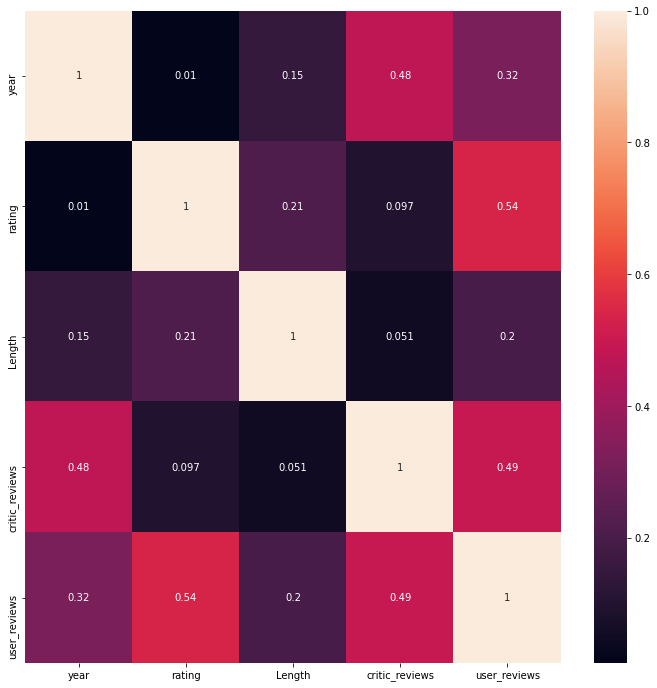

In [9]:
corr = iMDB.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True)

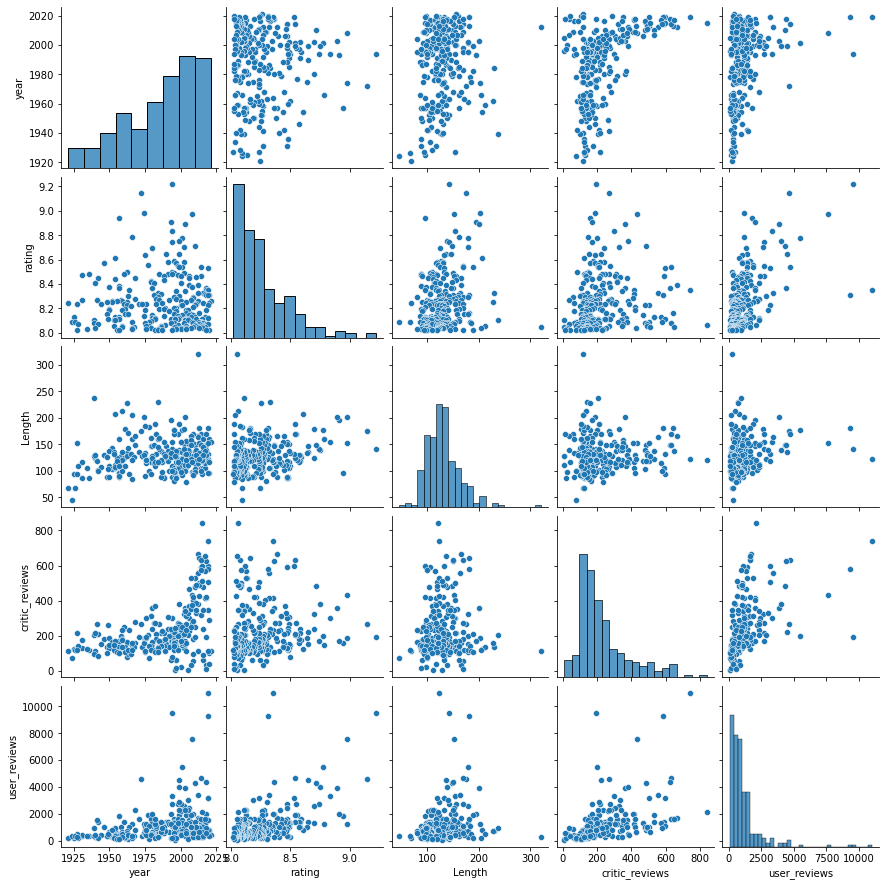

In [10]:
sns.pairplot(iMDB)

In [11]:
iMDB.describe()

,year,rating,Length,critic_reviews,user_reviews
count,250.000000,250.000000,250.00000,250.000000,250.000000
mean,1986.556000,8.260328,129.64400,231.192000,1175.524000
std,25.106977,0.224102,32.61774,149.480423,1403.308369
min,1921.000000,8.019748,45.00000,7.000000,73.000000
25%,1966.250000,8.088238,107.25000,134.000000,393.500000
50%,1994.000000,8.202313,126.00000,185.000000,768.500000
75%,2006.750000,8.364355,145.75000,276.000000,1400.000000
max,2021.000000,9.220472,321.00000,841.000000,11000.000000


Text(0.5, 1.0, 'Rating over the Years')

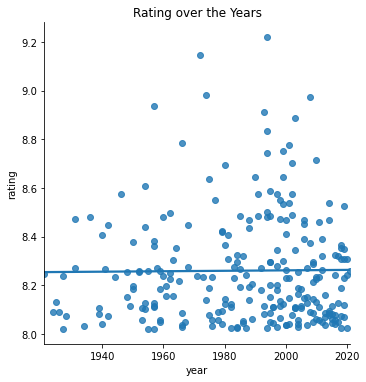

In [13]:
sns.lmplot(x ="year", y ="rating", data = iMDB, order = 1, ci = None)
plt.title("Rating over the Years")


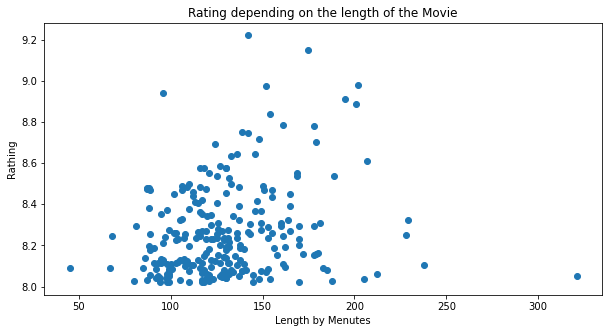

In [73]:
df = pd.DataFrame(iMDB)
  
X = list(df.Length)
Y = list(df.rating)
  
# Plot the data using bar() method
plt.figure(figsize=(10,5))
plt.scatter(X, Y)
plt.title("Rating depending on the length of the Movie")
plt.xlabel("Length by Menutes")
plt.ylabel("Rathing")

plt.show()



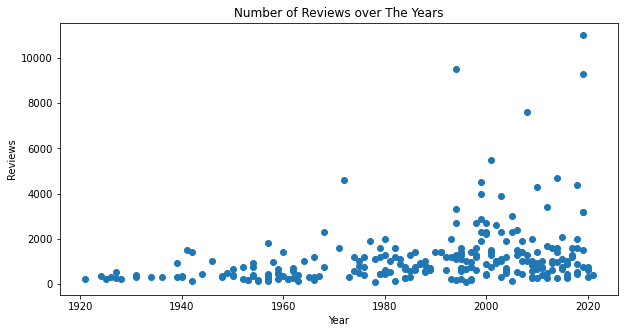

In [15]:
df = pd.DataFrame(iMDB)
  
X = list(df.year)
Y = list(df.user_reviews)
  
# Plot the data using bar() method
plt.figure(figsize=(10,5))
plt.scatter(X, Y)
plt.title("Number of Reviews over The Years")
plt.xlabel("Year")
plt.ylabel("Reviews")

plt.show()

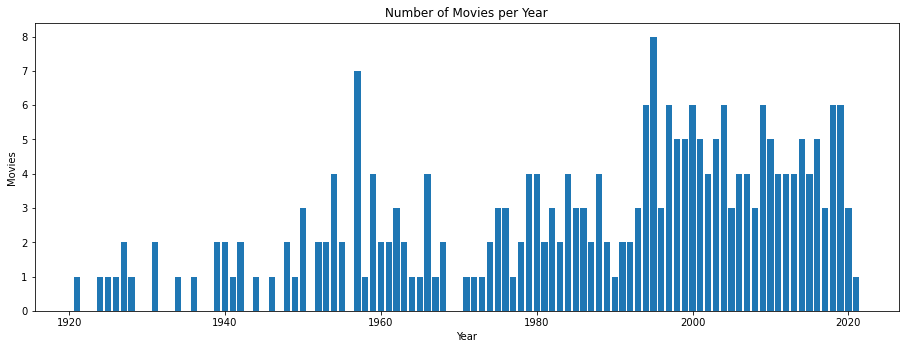

In [72]:
df = iMDB.groupby(['year']).movie_title.count().reset_index()
fig = plt.figure()
ax = fig.add_axes([0,1,2,1])
ax.bar(df['year'],df['movie_title'])
plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Movies")

plt.show()

In [17]:
df.sort_values('movie_title',axis = 0, ascending=False).reset_index().head()

,index,year,movie_title
0,58,1995,8
1,22,1957,7
2,63,2000,6
3,82,2019,6
4,72,2009,6


In [18]:
df_ = iMDB['Motion_Rating']


In [19]:
df_=pd.get_dummies(df_, drop_first=True,)

In [20]:
iMDB=pd.concat([iMDB, df_],axis=1)
iMDB.shape

(250, 20)

In [21]:
iMDB

,movie_title,year,director,rating,Motion_Rating,Length,critic_reviews,user_reviews,G,GP,Not Rated,PG,PG-13,PG12,Passed,R,R12,R15,R18,Unrated
0,The Shawshank Redemption,1994,Frank Darabont (dir.),9.220472,R12,142.0,192.0,9500.0,0,0,0,0,0,0,0,0,1,0,0,0
1,The Godfather,1972,Francis Ford Coppola (dir.),9.147190,PG12,175.0,267.0,4600.0,0,0,0,0,0,1,0,0,0,0,0,0
2,The Godfather: Part II,1974,Francis Ford Coppola (dir.),8.980494,R12,202.0,189.0,1200.0,0,0,0,0,0,0,0,0,1,0,0,0
3,The Dark Knight,2008,Christopher Nolan (dir.),8.972840,PG12,152.0,434.0,7600.0,0,0,0,0,0,1,0,0,0,0,0,0
4,12 Angry Men,1957,Sidney Lumet (dir.),8.938812,Approved,96.0,159.0,1800.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Princess Bride,1987,Rob Reiner (dir.),8.022647,PG,98.0,227.0,919.0,0,0,0,1,0,0,0,0,0,0,0,0
246,Ratsasan,2018,Ram Kumar (dir.),8.022625,Not Rated,170.0,10.0,534.0,0,0,1,0,0,0,0,0,0,0,0,0
247,Du rififi chez les hommes,1955,Jules Dassin (dir.),8.020981,Not Rated,118.0,109.0,141.0,0,0,1,0,0,0,0,0,0,0,0,0
248,Le notti di Cabiria,1957,Federico Fellini (dir.),8.020217,Not Rated,110.0,105.0,115.0,0,0,1,0,0,0,0,0,0,0,0,0


# sklearn model

In [41]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.metrics import r2_score

In [74]:
X_train, X_test, y_train, y_test = train_test_split(iMDB[['year','Length', 'critic_reviews', 
       'user_reviews','G','GP','Not Rated',
        'PG','PG-13','PG12','Passed','R','R12','R15','R18','Unrated']],
        iMDB[['rating']], test_size=0.30, random_state=42)

In [75]:
lm = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores.mean()


0.2946279039637606

In [76]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred = lm.predict(X_test)
r2_score(y_test,pred)

0.1627318934215044

# stat model

In [57]:

import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     10.45
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           3.86e-17
Time:                        07:29:36   Log-Likelihood:                 68.151
No. Observations:                 175   AIC:                            -104.3
Df Residuals:                     159   BIC:                            -53.67
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.9054      1.459      8.847      0.000      10.024      15.786
year              -0.0024      0.001     -3.272      0.001      -0.004      -0.001
Length             0.0011      0.000      2.306      0.022       0.000       0.002
critic_reviews    -0.0001      0.000     -1.146      0.253      -0.000    9.59e-05
user_reviews    8.348e-05   1.36e-05      6.125      0.000    5.66e-05       0.000
G                 -0.0098      0.071     -0.139      0.889      -0.149       0.130
GP             -2.018e-14    2.3e-15     -8.779      0.000   -2.47e-14   -1.56e-14
Not Rated         -0.0790      0.068     -1.167      0.245      -0.213       0.055
PG                 0.0446      0.070      0.641      0.522      -0.093       0.182
PG-13             -0.0571      0.082     -0.693      0.489      -0.220       0.106
PG12               0.3194      0.130      2.451      0.015       0.062       0.577
Passed            -0.1471      0.084     -1.751      0.082      -0.313       0.019
R                 -0.0308      0.068     -0.455      0.650      -0.164       0.103
R12                0.1664      0.079      2.107      0.037       0.010       0.322
R15                0.0225      0.092      0.243      0.808      -0.160       0.205
R18                0.0071      0.089      0.079      0.937      -0.169       0.183
Unrated           -0.0356      0.184     -0.193      0.847      -0.400       0.328
==============================================================================
Omnibus:                       12.942   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.369
Skew:                           0.569   Prob(JB):                     0.000758
Kurtosis:                       3.822   Cond. No.                     9.33e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
X_train, X_test, y_train, y_test = train_test_split(iMDB[['year','Length', 
       'user_reviews','PG12','R12']], iMDB[['rating']], test_size=0.30, random_state=42)

In [64]:

import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     28.02
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.29e-20
Time:                        07:30:08   Log-Likelihood:                 60.964
No. Observations:                 175   AIC:                            -109.9
Df Residuals:                     169   BIC:                            -90.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.1893      1.140     10.694      0.000       9.939      14.439
year            -0.0021      0.001     -3.632      0.000      -0.003      -0.001
Length           0.0011      0.000      2.375      0.019       0.000       0.002
user_reviews  7.798e-05   1.23e-05      6.365      0.000    5.38e-05       0.000
PG12             0.3448      0.114      3.017      0.003       0.119       0.570
R12              0.1952      0.053      3.685      0.000       0.091       0.300
==============================================================================
Omnibus:                       16.734   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.933
Skew:                           0.660   Prob(JB):                     4.69e-05
Kurtosis:                       3.995   Cond. No.                     2.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

C:\Users\IBRAHIM\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [66]:
lasso_model.alpha_

0.015167168884709226

In [67]:
test_set_pred = lasso_model.predict(X_test)
r2_score(y_test, test_set_pred)

0.0904108957785974